In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* the data is clean and does not have any null or missing values

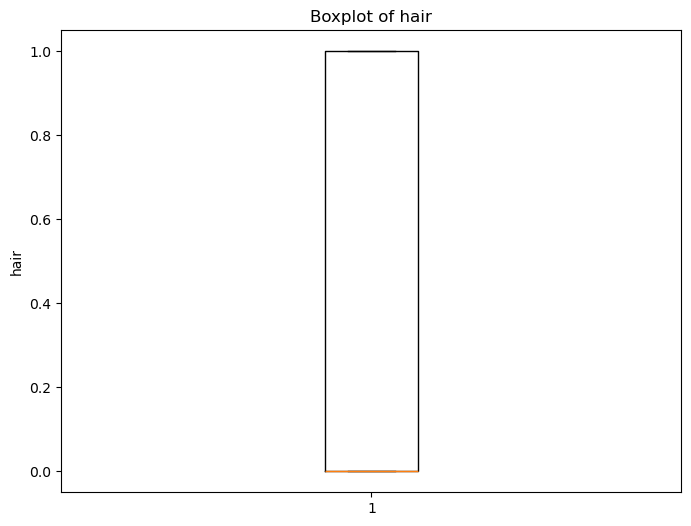

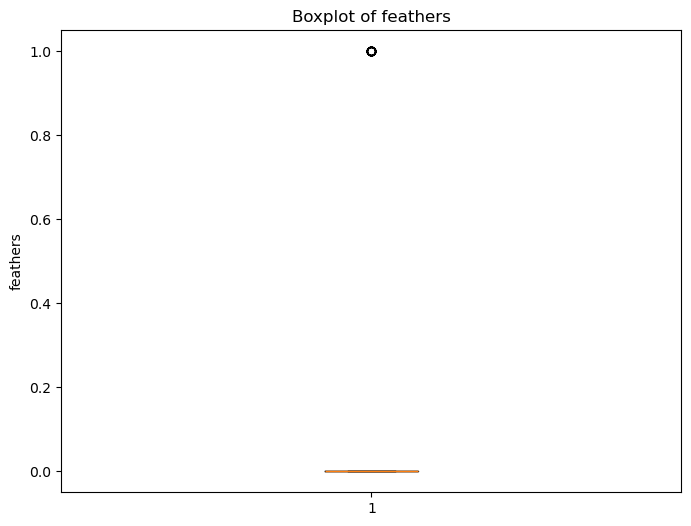

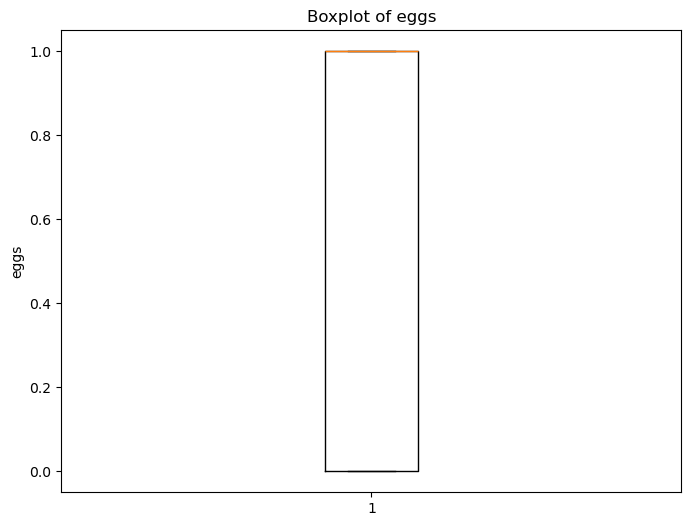

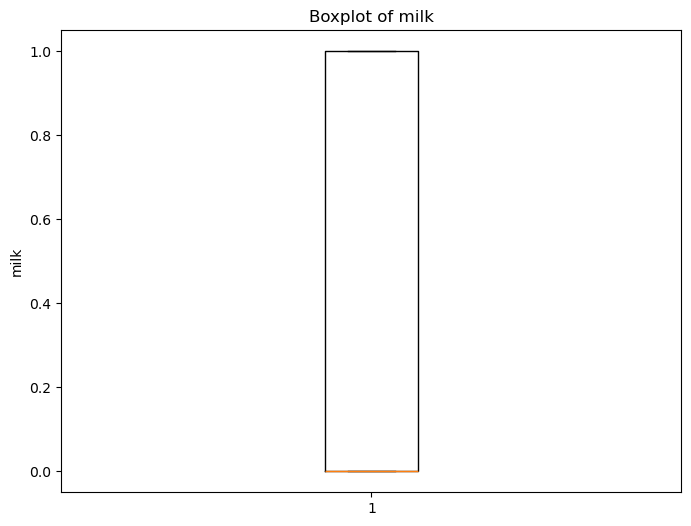

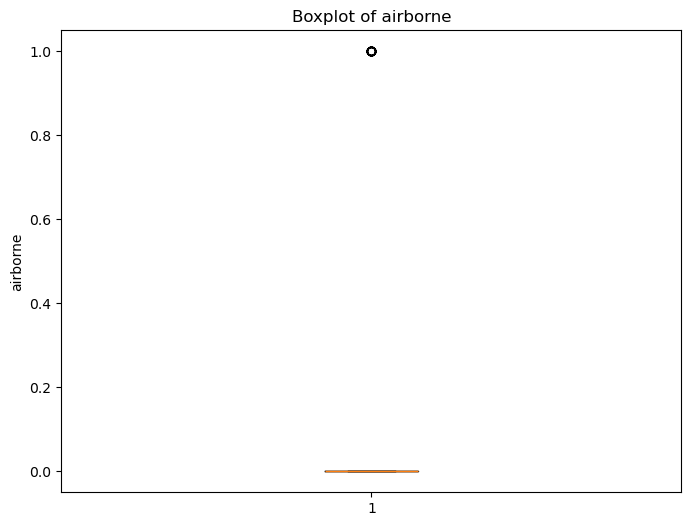

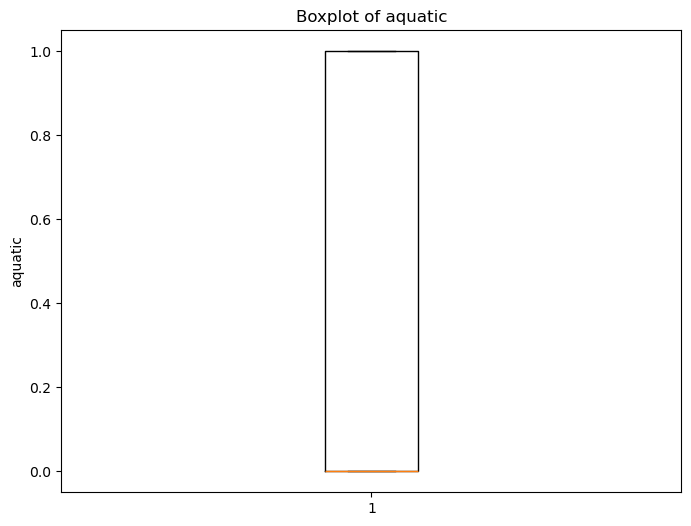

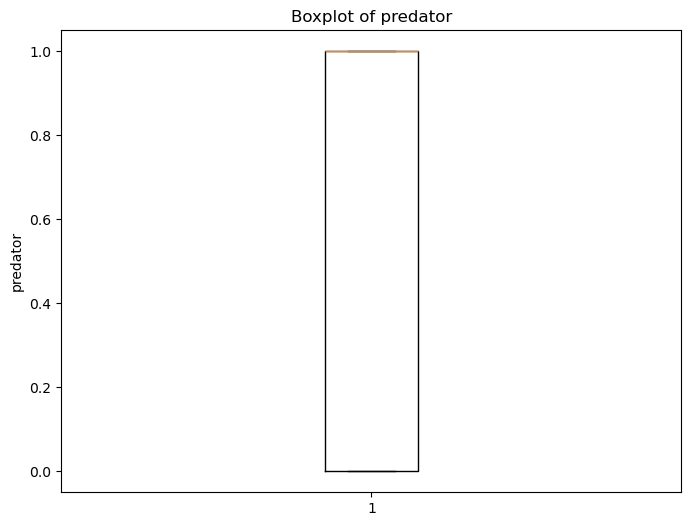

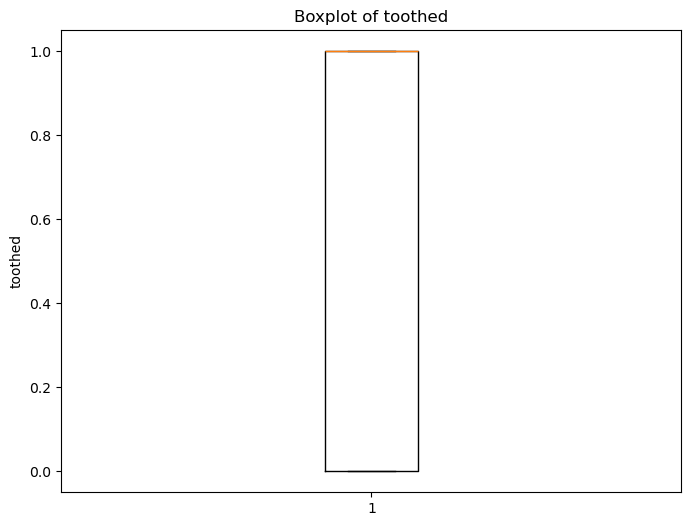

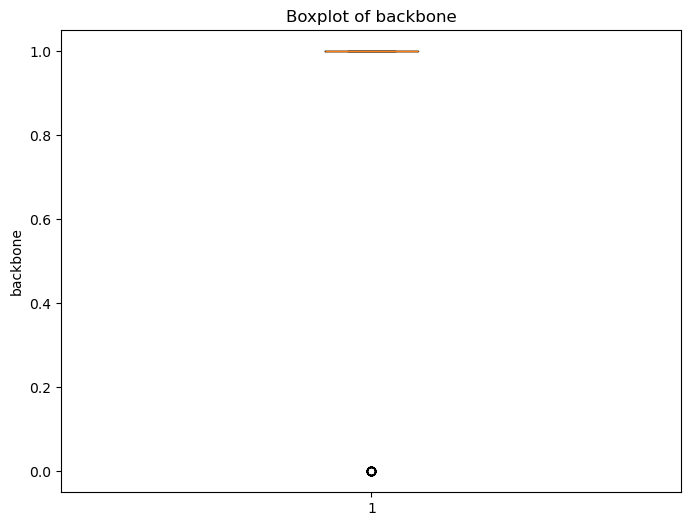

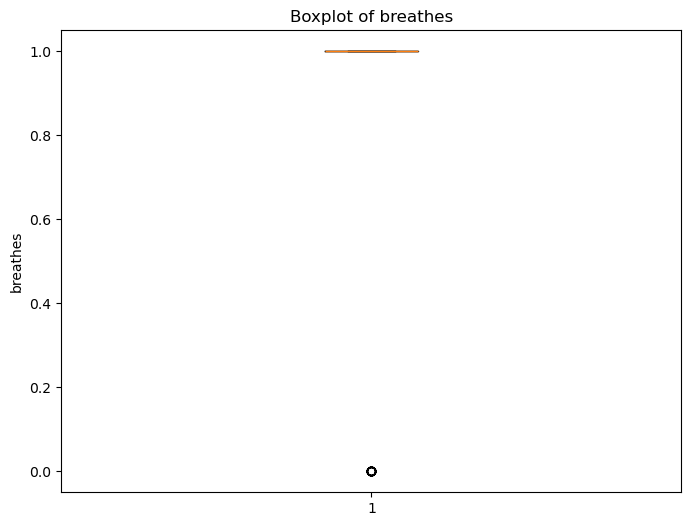

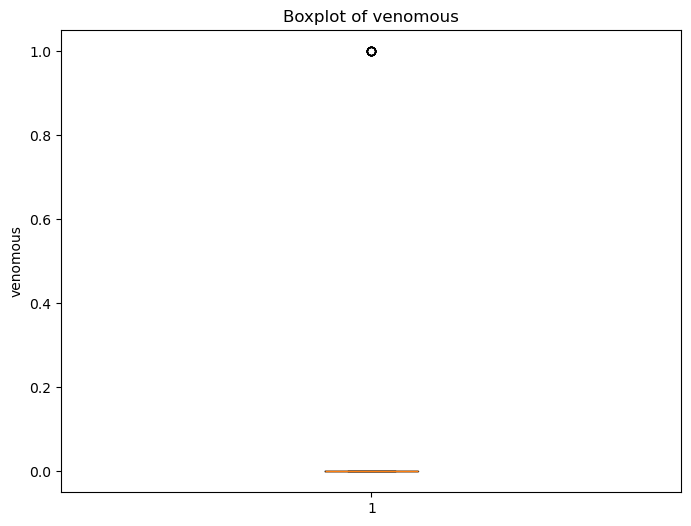

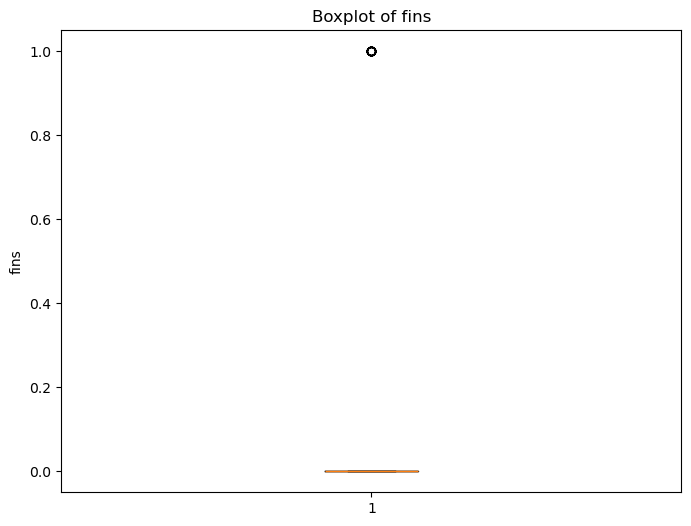

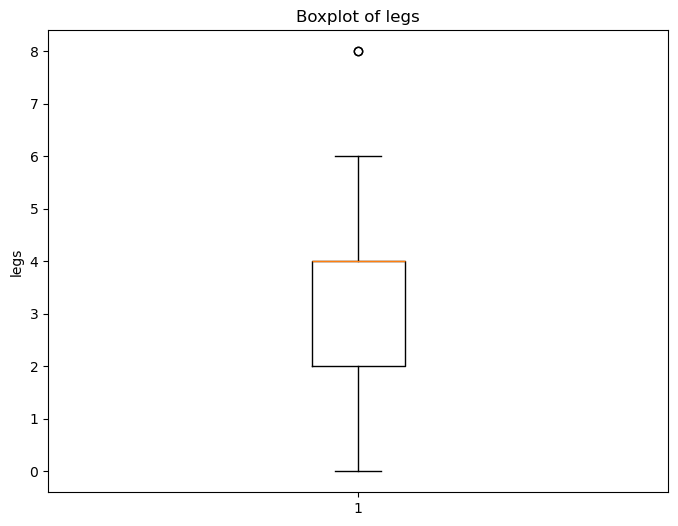

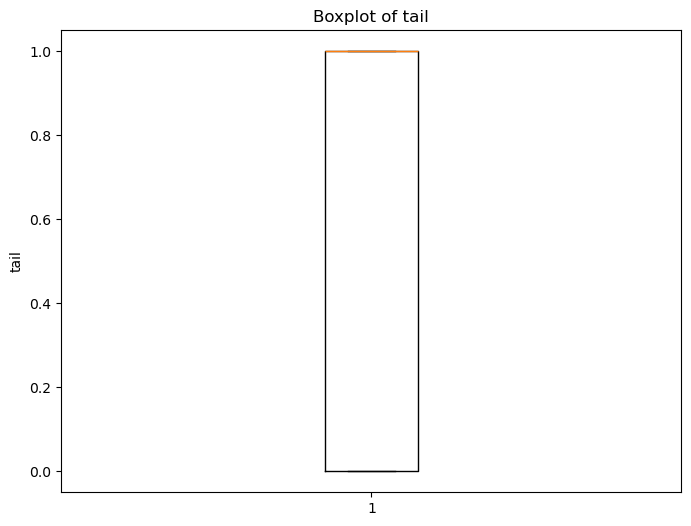

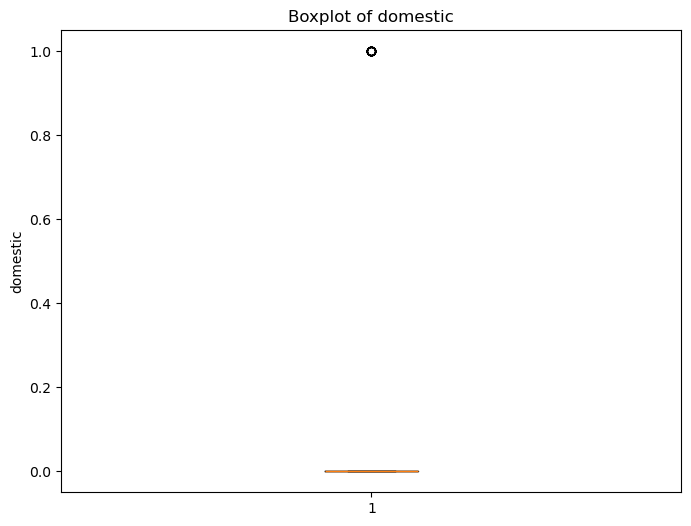

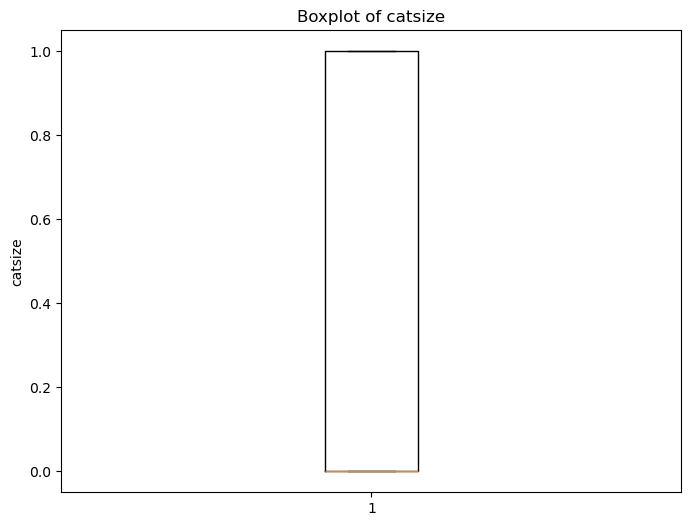

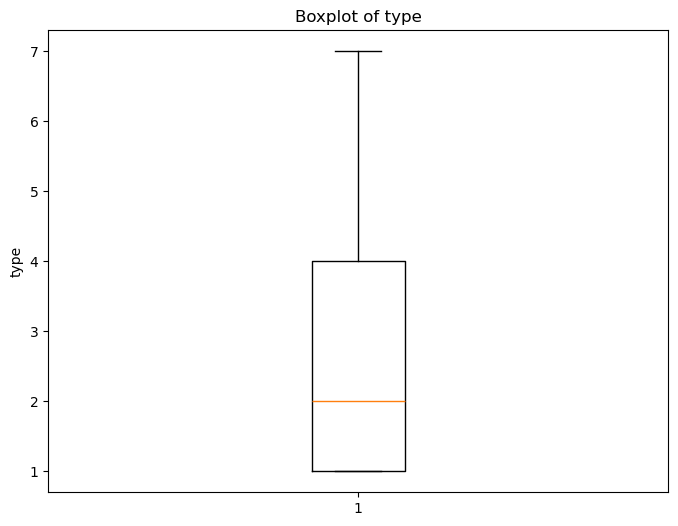

In [7]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column])  # Drop missing values before plotting
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()

In [43]:
top_columns = df.nunique().sort_values(ascending=False).head(5).index

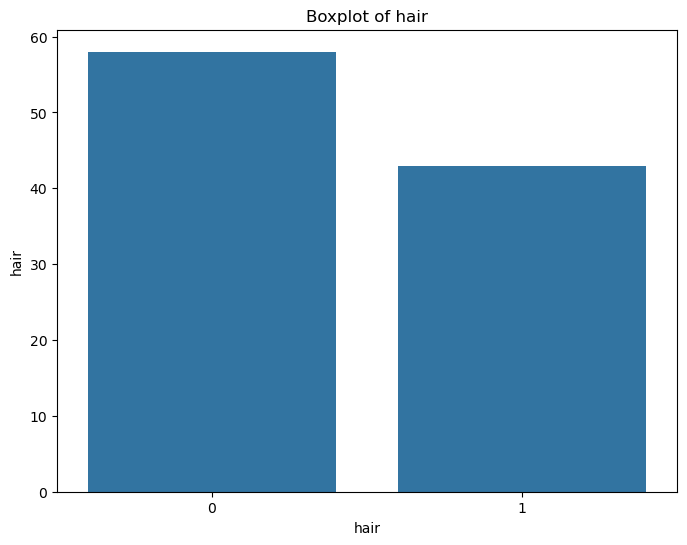

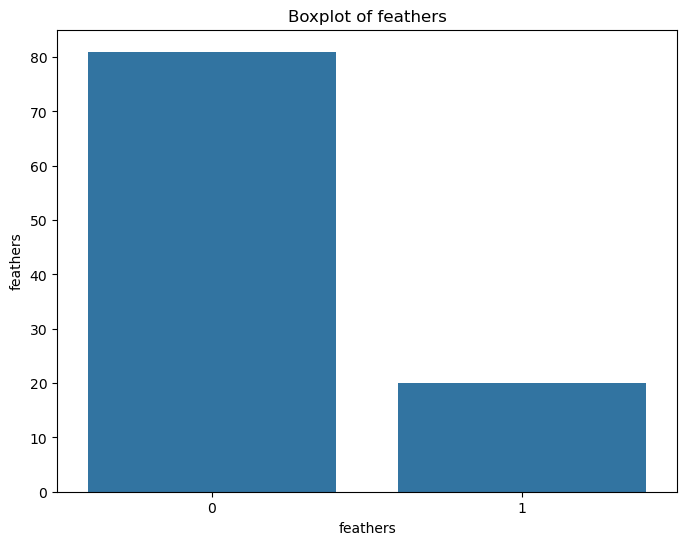

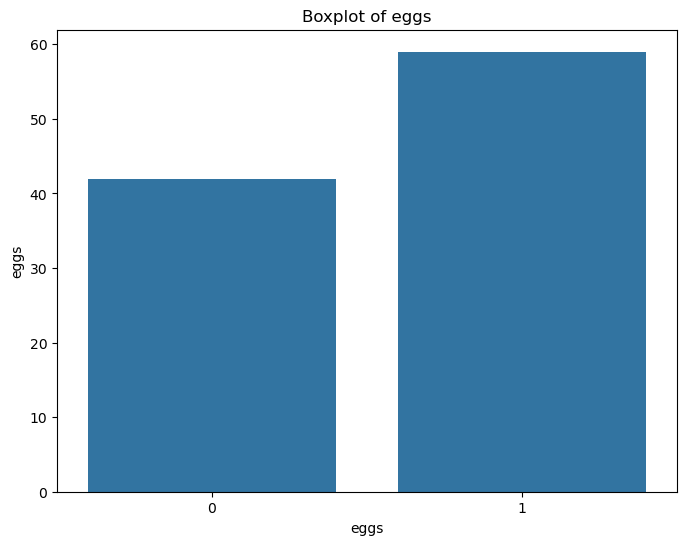

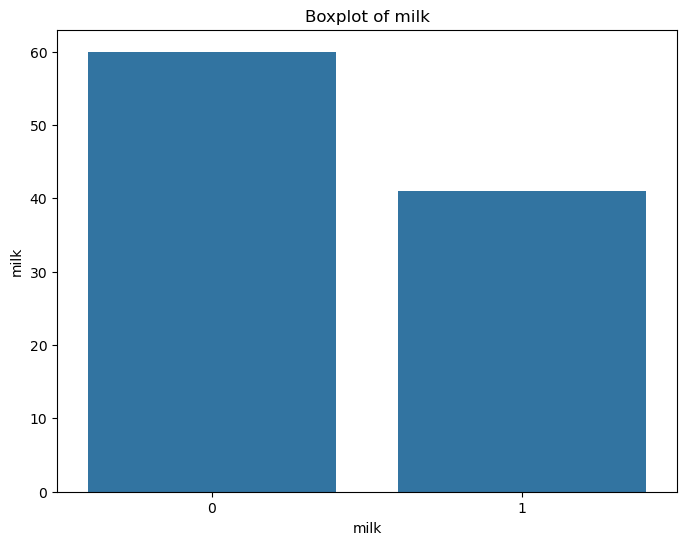

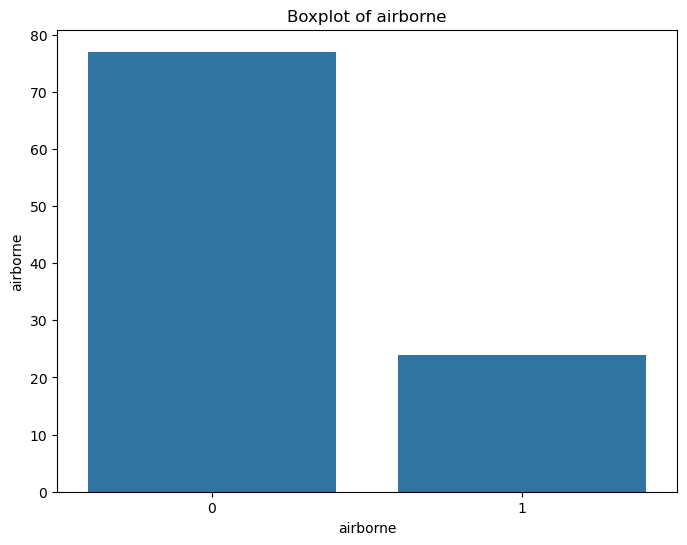

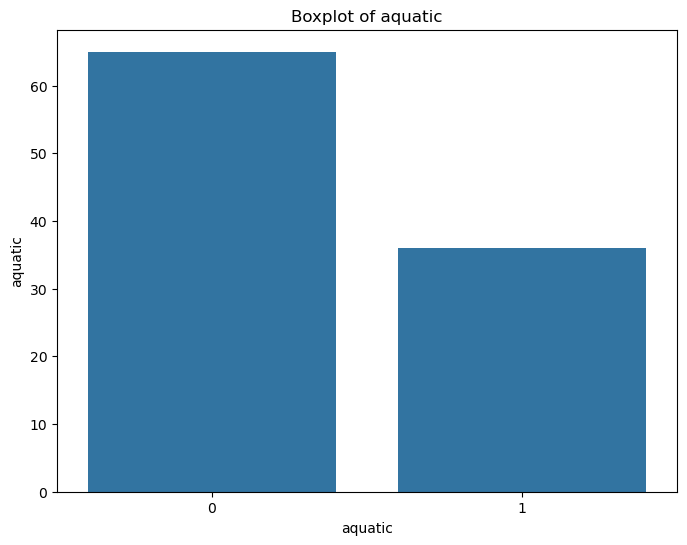

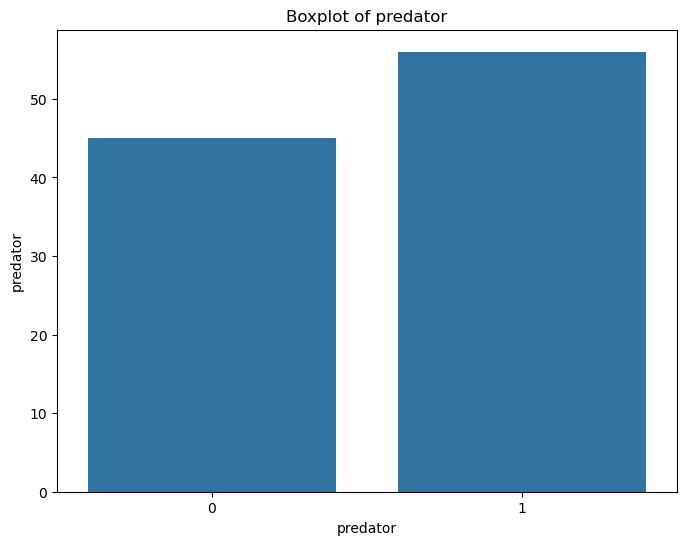

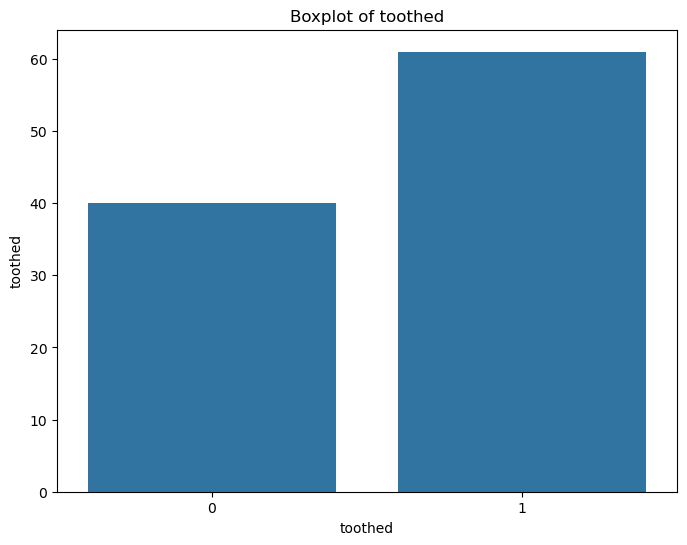

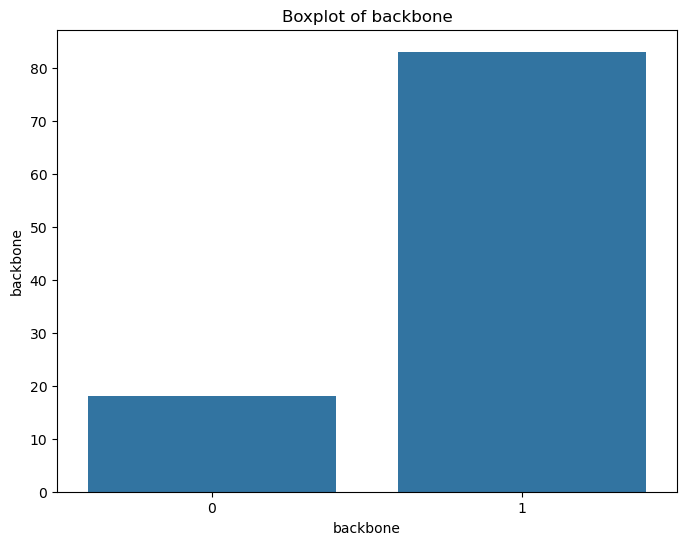

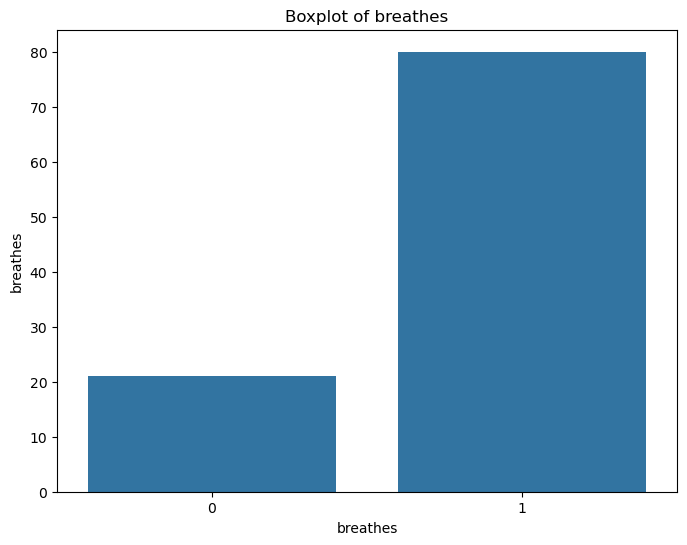

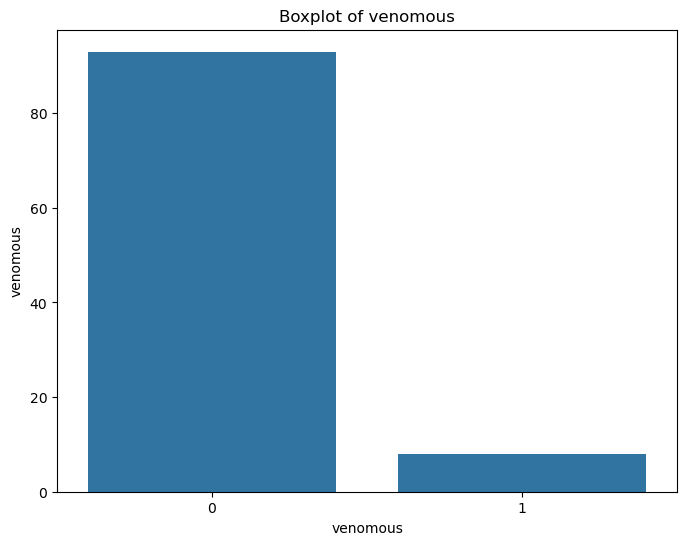

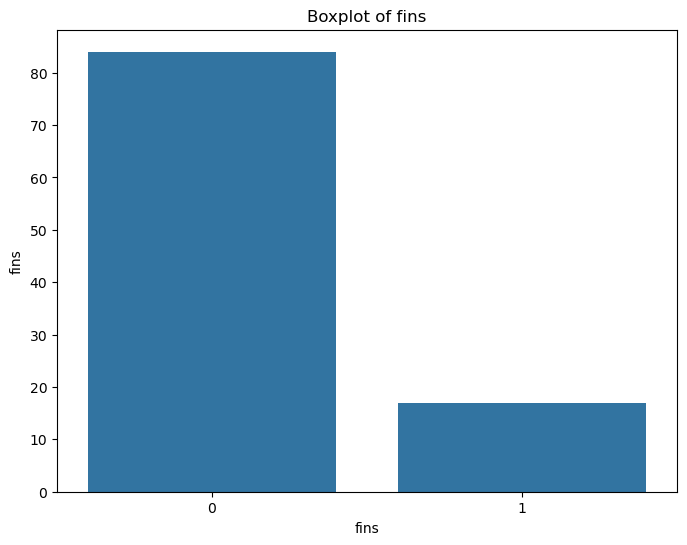

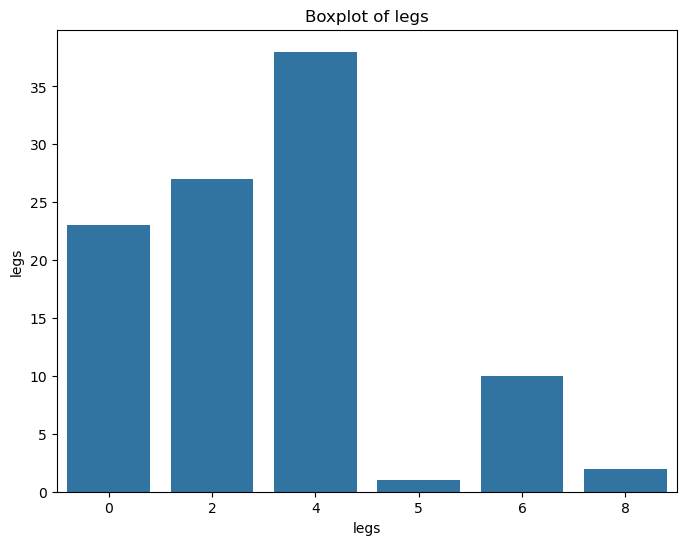

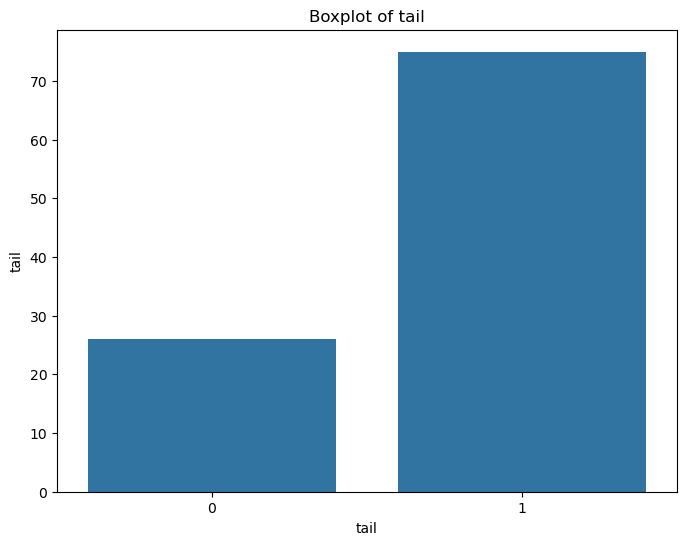

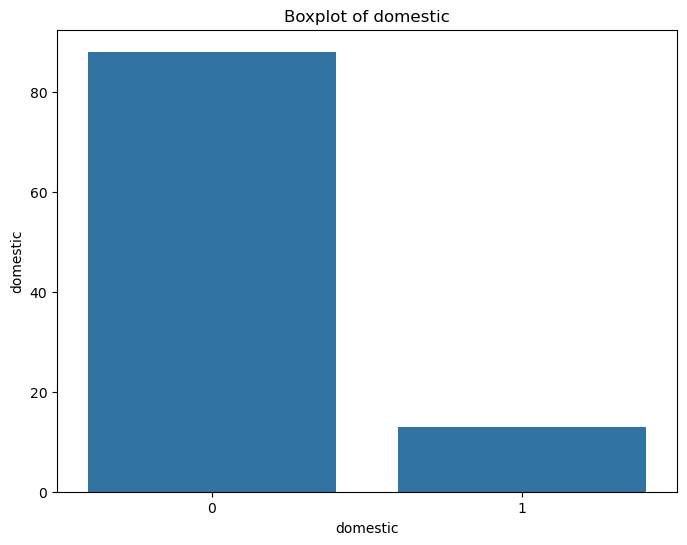

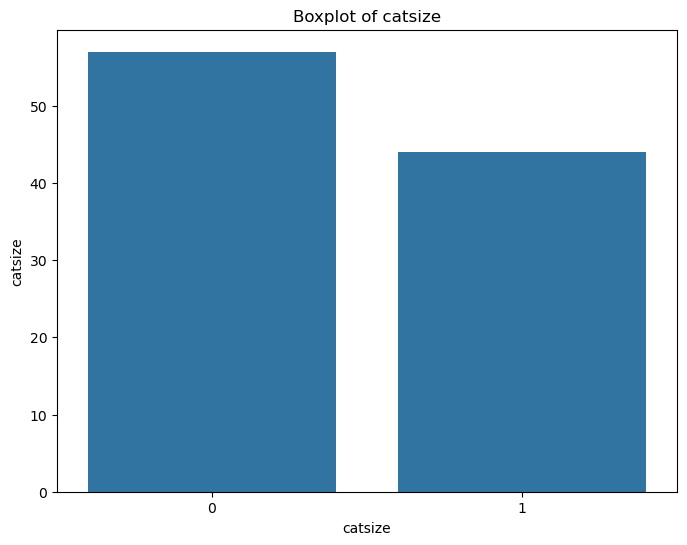

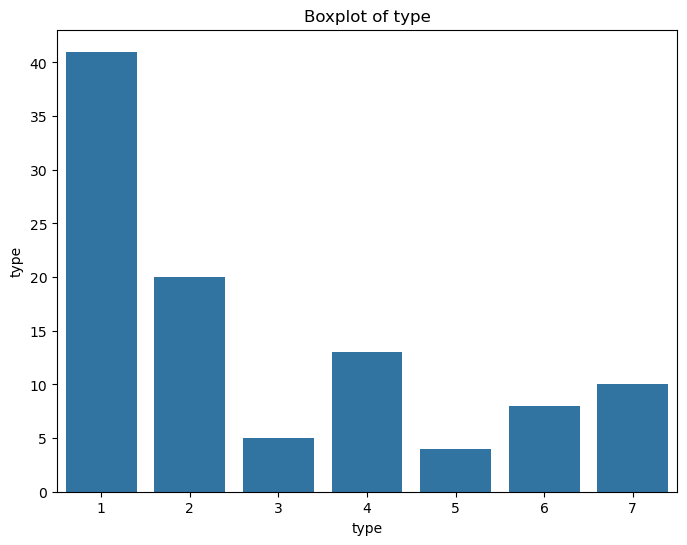

In [53]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column,)
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()

* in this data most of the columns are answered in the "yes or no" format (1,0) so finding an outlier is impossible.

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['animal name', 'type'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (80, 16)
Testing set size: (21, 16)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


In [13]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 4]


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)



In [15]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, y, cv=kfold)
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.8, 0.8, 0.5, 0.6, 0.8])

In [16]:
print(results.mean())

0.78


C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASHISH\anaconda3

Best K value: 1


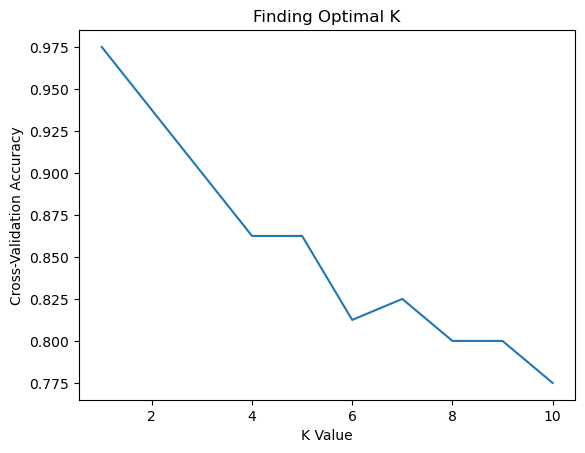

In [17]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Test different values for K (1 to 10)
k_values = range(1, 11)
cv_scores = []

# Perform 5-fold cross-validation for each value of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the value of K with the highest accuracy
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K value: {best_k}")

# Plot the cross-validation accuracy for different values of K

plt.plot(k_values, cv_scores)
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Finding Optimal K')
plt.show()



* The optimal K value seems to be around 4, where you achieved the highest mean accuracy. This suggests that K=4 strikes a good balance between bias and variance, providing a model that generalizes well without overfitting

In [19]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a KNN classifier with the optimal K value (e.g., K=4)
optimal_k = 4
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1 Score: 0.9333


C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_17112\635521154.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_vis_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='x', label='Test')


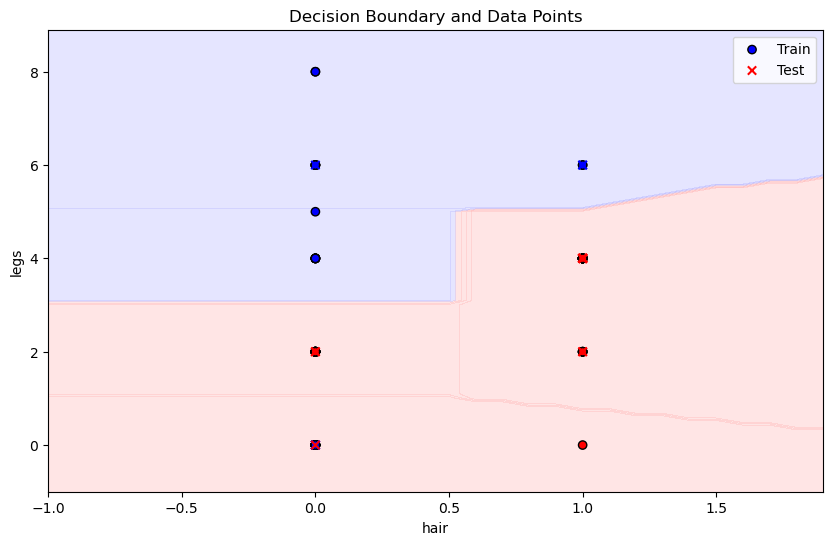

In [20]:
from matplotlib.colors import ListedColormap

# Choose two features for visualization (e.g., 'hair' and 'legs')
feature1 = 'hair'
feature2 = 'legs'

# Extract the feature columns and target for visualization
X_vis = df[[feature1, feature2]]
y_vis = df['type']

# Split the dataset for visualization
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Create the KNN classifier with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_vis_train, y_vis_train)

# Create a mesh grid
x_min, x_max = X_vis[feature1].min() - 1, X_vis[feature1].max() + 1
y_min, y_max = X_vis[feature2].min() - 1, X_vis[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

# Plot training points
plt.scatter(X_vis_train[feature1], X_vis_train[feature2], c=y_vis_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o', label='Train')

# Plot testing points
plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_vis_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='x', label='Test')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary and Data Points')
plt.legend()
plt.show()


C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_17112\3692440910.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_vis_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='x', label='Test')


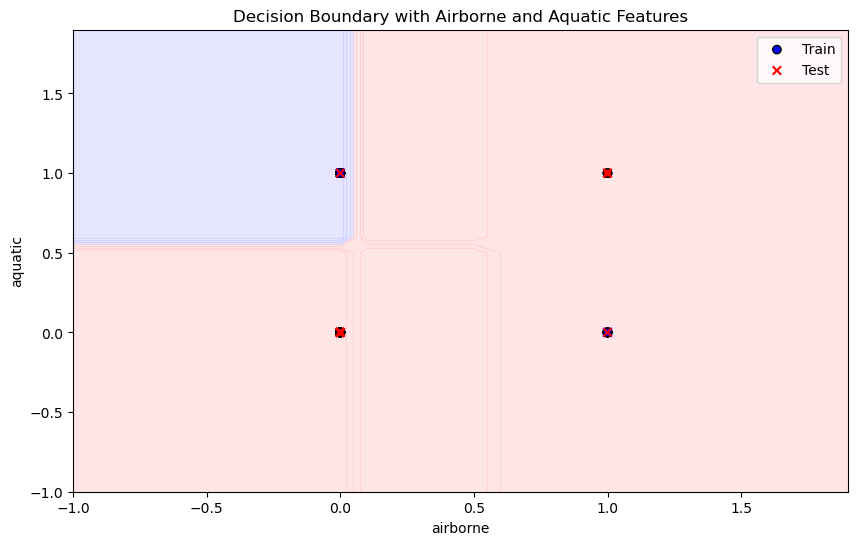

In [21]:
# Choose features for visualization
feature1 = 'airborne'
feature2 = 'aquatic'

# Extract the feature columns and target for visualization
X_vis = df[[feature1, feature2]]
y_vis = df['type']

# Split the dataset for visualization
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Create the KNN classifier with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_vis_train, y_vis_train)

# Create a mesh grid
x_min, x_max = X_vis[feature1].min() - 1, X_vis[feature1].max() + 1
y_min, y_max = X_vis[feature2].min() - 1, X_vis[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

# Plot training points
plt.scatter(X_vis_train[feature1], X_vis_train[feature2], c=y_vis_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o', label='Train')

# Plot testing points
plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_vis_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='x', label='Test')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary with Airborne and Aquatic Features')
plt.legend()
plt.show()


C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_17112\1013269286.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_vis_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='x', label='Test')


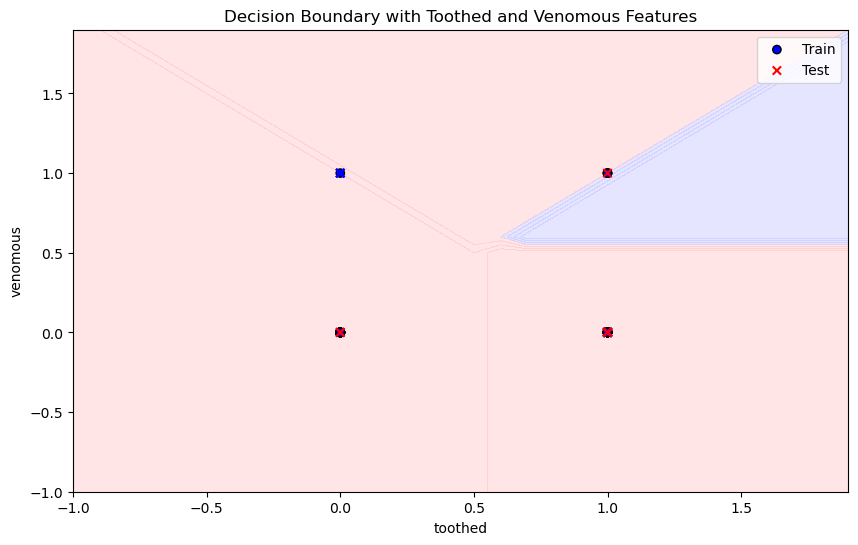

In [22]:
# Choose features for visualization
feature1 = 'toothed'
feature2 = 'venomous'

# Extract the feature columns and target for visualization
X_vis = df[[feature1, feature2]]
y_vis = df['type']

# Split the dataset for visualization
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Create the KNN classifier with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_vis_train, y_vis_train)

# Create a mesh grid
x_min, x_max = X_vis[feature1].min() - 1, X_vis[feature1].max() + 1
y_min, y_max = X_vis[feature2].min() - 1, X_vis[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

# Plot training points
plt.scatter(X_vis_train[feature1], X_vis_train[feature2], c=y_vis_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='o', label='Train')

# Plot testing points
plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_vis_test, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), marker='x', label='Test')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary with Toothed and Venomous Features')
plt.legend()
plt.show()


### 1. What are the key hyperparameters in KNN?
* K (Number of Neighbors): Determines how many neighbors to consider for predictions.
* Distance Metric: Measures how distance is calculated (e.g., Euclidean, Manhattan, Minkowski).
* Weights: Influences how neighbors affect predictions (uniform or distance-based).
### 2. What are Distance Metrics in KNN ?
* Euclidean Distance: Straight-line distance between two points.
* Manhattan Distance: Distance measured along axes at right angles.